In [1]:
import librosa
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import librosa.display
import IPython.display as ipd
import os
from tqdm import tqdm
import warnings
import pickle
from audio2numpy import open_audio
from nnAudio import Spectrogram
import torch
from sys import getsizeof

In [2]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [5]:
data_dir = '/Users/madhavapaliyam/Documents/CMSC/rando/raganet/data'
hop_length = 1024
n_chroma = 12
image_length = 600
#trim 650 from front and back ~30 seconds
def save_chunks(ragam):
    ragam_dir = os.path.join(data_dir, ragam)
    chroma_list = np.zeros((0,12,600))
#     filt = Spectrogram.CQT2010v2(hop_length = hop_length)
    for i,song in enumerate(listdir_nohidden(ragam_dir)):
#         print("Processing: ", song, str(i))
        path = os.path.join(ragam_dir,song)
        try:
            signal, sampling_rate = open_audio(path)
        except:
            print("FAILED:", song)
            continue
            
#         print("done opening")
        if len(signal.shape) > 1: 
            signal = np.mean(signal, axis = 1)
#         chroma = np.array(filt(torch.tensor(signal)))
        S = librosa.cqt(signal, sr=sampling_rate, hop_length=hop_length)
        mean_S = np.mean(S, axis = 0)
        chroma = librosa.feature.chroma_cqt(signal, sr=sampling_rate, 
                                            n_chroma = n_chroma, hop_length=hop_length)
#         print("done cqt", str(chroma.shape))
        chroma = chroma[:,650:-650]
        mean_S = mean_S[650:-650]
        chroma = chroma * mean_S
        
        if chroma.shape[1] >= image_length: 
            num_groups = chroma.shape[1] // image_length
            bound = num_groups * image_length
            chroma = chroma[:,0:bound]
            chunks = np.split(chroma, num_groups, axis = 1)
            chroma_list = np.concatenate((chroma_list, np.array(chunks)))
        
        print("Finished song:", song, " Chromagram size: ", chroma.shape, "Number of Chunks: ", len(chunks))
#         print(chroma_list.shape)
    return chroma_list

In [6]:
chr_list = save_chunks('AbhEri')

Finished song: 06-nagumOmu_ganalEni-AbhEri (13).mp3  Chromagram size:  (12, 70800) Number of Chunks:  118
Finished song: 03-nagumOmu_ganalEni-AbhEri (6).mp3  Chromagram size:  (12, 81000) Number of Chunks:  135
Finished song: 10-nagumOmu_ganalEni-abhEri-Adhi-thyAgarAja.mp3  Chromagram size:  (12, 28800) Number of Chunks:  48
Finished song: 08-nagumOmu_ganalEni-AbhEri-tyAgarAja.mp3  Chromagram size:  (12, 87600) Number of Chunks:  146
Finished song: 05-nagumOmu_ganalEni-abhEri-Adhi-thyAgarAja.mp3  Chromagram size:  (12, 31800) Number of Chunks:  53
Finished song: 17-nagumOmu_ganalEni-AbhEri.mp3  Chromagram size:  (12, 3000) Number of Chunks:  5
Finished song: 11-bhajarE_rE_mAnasa_shrI-AbhEri.mp3  Chromagram size:  (12, 39000) Number of Chunks:  65
Finished song: 04_kandA_vandaruL_AbhEri_pApanAsam_sivan.mp3  Chromagram size:  (12, 66000) Number of Chunks:  110
Finished song: 02-nagumOmu_ganalEni-AbhEri (11).mp3  Chromagram size:  (12, 16200) Number of Chunks:  27
Finished song: 02-nagumO

Finished song: 02-bhajarE_rE_mAnasa_shrI-AbhEri.mp3  Chromagram size:  (12, 18600) Number of Chunks:  31
Finished song: 07-nagumOmu_ganalEni-abhEri-Adhi-ThyAgarAja (1).mp3  Chromagram size:  (12, 49200) Number of Chunks:  82
Finished song: 02-nagumOmu_ganalEni-AbhEri (10).mp3  Chromagram size:  (12, 31200) Number of Chunks:  52
Finished song: 03-kandA_vandaruL-AbhEri (6).mp3  Chromagram size:  (12, 12600) Number of Chunks:  21
Finished song: 12-gOkula_nilaya_krpAlaya-AbhEri.mp3  Chromagram size:  (12, 9600) Number of Chunks:  16
Finished song: 02-eeshwari_rAjEshwari-AbhEri (1).mp3  Chromagram size:  (12, 58200) Number of Chunks:  97
Finished song: 03-nagumOmu_ganalEni-AbhEri (7).mp3  Chromagram size:  (12, 14400) Number of Chunks:  24
Finished song: 07-kandA_vandaruL-AbhEri.mp3  Chromagram size:  (12, 12000) Number of Chunks:  20
Finished song: 06-nagumOmu_ganalEni-AbhEri (12).mp3  Chromagram size:  (12, 39600) Number of Chunks:  66
Finished song: 04-vINAbhEri_vEnuvAdyAdi-AbhEri.mp3  C

Finished song: 107-nagumOmu_ganalEni-AbhEri.mp3  Chromagram size:  (12, 31800) Number of Chunks:  53
Finished song: 03-nagumOmu_ganalEni-AbhEri (1).mp3  Chromagram size:  (12, 78600) Number of Chunks:  131
Finished song: 11-nagumOmu_ganalEni-AbhEri.mp3  Chromagram size:  (12, 8400) Number of Chunks:  14
Finished song: 06-nagumOmu_ganalEni-AbhEri (14).mp3  Chromagram size:  (12, 51600) Number of Chunks:  86
Finished song: 06-nagumOmu_ganalEni-AbhEri (8).mp3  Chromagram size:  (12, 53400) Number of Chunks:  89
Finished song: 06-bhajarE_rE_mAnasa_shrI-AbhEri (4).mp3  Chromagram size:  (12, 141000) Number of Chunks:  235
Finished song: 01_Nagumomu_Abheri_Adi_Thyagaraja_1960 (4).mp3  Chromagram size:  (12, 30600) Number of Chunks:  51
Finished song: 07-nagumOmu_ganalEni-AbhEri (1).mp3  Chromagram size:  (12, 70800) Number of Chunks:  118
Finished song: 09-nagumOmu_ganalEni-AbhEri (2).mp3  Chromagram size:  (12, 27000) Number of Chunks:  45
Finished song: 01_Nagumomu_Abheri_Adi_Thyagaraja_19

Finished song: 05-ninnu_vinA_mari_galadA-AbhEri (2).mp3  Chromagram size:  (12, 10200) Number of Chunks:  17
Finished song: 031-nagumOmu_ganalEni-AbhEri.mp3  Chromagram size:  (12, 30600) Number of Chunks:  51
Finished song: 03-ninnu_vinA_mari_galadA-AbhEri.mp3  Chromagram size:  (12, 46800) Number of Chunks:  78
Finished song: 03-bhajarE_rE_mAnasa_shrI-AbhEri (6).mp3  Chromagram size:  (12, 25200) Number of Chunks:  42
Finished song: 06-nagumOmu_ganalEni-AbhEri (6).mp3  Chromagram size:  (12, 22200) Number of Chunks:  37
Finished song: 05-rAgam_AbhEri (1).mp3  Chromagram size:  (12, 61200) Number of Chunks:  102
Finished song: 06-nagumOmu_ganalEni-AbhEri.mp3  Chromagram size:  (12, 600) Number of Chunks:  1
Finished song: 06-gOkula_nilaya_krpAlaya-AbhEri.mp3  Chromagram size:  (12, 9600) Number of Chunks:  16
Finished song: 03-nagumOmu_ganalEni-AbhEri (12).mp3  Chromagram size:  (12, 122400) Number of Chunks:  204
Finished song: 04-bhajarE_rE_mAnasa_shrI-AbhEri (10).mp3  Chromagram si

Finished song: 04-nagumOmu_ganalEni-AbhEri (2).mp3  Chromagram size:  (12, 36600) Number of Chunks:  61
Finished song: DKP-08---Bhajare-Re-Manasa---Abheri.mp3  Chromagram size:  (12, 39600) Number of Chunks:  66
Finished song: 09-bhajarE_rE_mAnasa_shrI-AbhEri-mysore_vAsudevAcAr (1).mp3  Chromagram size:  (12, 35400) Number of Chunks:  59
Finished song: 04-nagumOmu_ganalEni-abhEri-Adhi-thyAgarAja.mp3  Chromagram size:  (12, 25200) Number of Chunks:  42
Finished song: 03-nagumOmu_ganalEni-AbhEri.mp3  Chromagram size:  (12, 16200) Number of Chunks:  27
Finished song: 11-nagumOmu_ganalEni-abhEri-Adhi-thyAgarAja.mp3  Chromagram size:  (12, 23400) Number of Chunks:  39
Finished song: 09-nagumOmu_ganalEni-abhEri-Adhi-thyAgarAja (1).mp3  Chromagram size:  (12, 37200) Number of Chunks:  62
Finished song: 01_Nagumomu_Abheri_Adi_Thyagaraja_1960 (10).mp3  Chromagram size:  (12, 30600) Number of Chunks:  51
Finished song: 07-nagumOmu_ganalEni-AbhEri (5).mp3  Chromagram size:  (12, 21000) Number of 

In [7]:
np.save("abheri.npy", chr_list)

In [8]:


s_list = save_chunks('shuddhadhanyAsi')

Finished song: 004-Sri_Parthasarathy-Suddha_Dhanyasi-Rupakam-Dhikshithar.mp3  Chromagram size:  (12, 2400) Number of Chunks:  4
Finished song: 05-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (4).mp3  Chromagram size:  (12, 21000) Number of Chunks:  35
Finished song: 04-shrI_pArthasArathinA-shuddhadhanyAsi (4).mp3  Chromagram size:  (12, 72000) Number of Chunks:  120
Finished song: 10-RTP-pallavi-shuDhDha_DhanyAsi-ghan_rAga_pancha_rAgamAlike (3).mp3  Chromagram size:  (12, 55800) Number of Chunks:  93
Finished song: 10-RTP-pallavi-shuDhDha_DhanyAsi-ghan_rAga_pancha_rAgamAlike.mp3  Chromagram size:  (12, 55800) Number of Chunks:  93
Finished song: 01-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (9).mp3  Chromagram size:  (12, 19200) Number of Chunks:  32
Finished song: 03-himagiri_tanayE-shuddhadhanyAsi (5).mp3  Chromagram size:  (12, 19800) Number of Chunks:  33
Finished song: 01-shrI_rAjamAtangi-shuddhadhanyAsi (25).mp3  Chromagram size:  (12, 16200) Number of Chunks:  27
Finished song: 03-sub

Finished song: 03-shrI_pArthasArathinA-shuddhadhanyAsi (8).mp3  Chromagram size:  (12, 27600) Number of Chunks:  46
Finished song: 05-himagiri_tanayE-shuddhadhanyAsi.mp3  Chromagram size:  (12, 96000) Number of Chunks:  160
Finished song: 01-himagiri_tanayE-shuddhadhanyAsi (2).mp3  Chromagram size:  (12, 25200) Number of Chunks:  42
Finished song: 04-shrI_pArthasArathinA-shuddhadhanyAsi (2).mp3  Chromagram size:  (12, 7200) Number of Chunks:  12
Finished song: 05-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (2).mp3  Chromagram size:  (12, 25200) Number of Chunks:  42
Finished song: 03-himagiri_tanayE-shuddhadhanyAsi (3).mp3  Chromagram size:  (12, 10800) Number of Chunks:  18
Finished song: 06-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (6).mp3  Chromagram size:  (12, 45000) Number of Chunks:  75
Finished song: 07-subrahmaNyEna_rakSitOham-shuddhadhanyAsi.mp3  Chromagram size:  (12, 41400) Number of Chunks:  69
Finished song: 01-shrI_rAjamAtangi-shuddhadhanyAsi (23).mp3  Chromagram size:  (12,

Finished song: 05---Subramanyena-Rakshitoham---SuddhaDhanyasi.mp3  Chromagram size:  (12, 24000) Number of Chunks:  40
Finished song: 02-sAmOdaM_cintayAmi-shuddhadhanyAsi (3).mp3  Chromagram size:  (12, 39000) Number of Chunks:  65
Finished song: 02-prAnapatE_gunapatE_ganapatE-shuddhadhanyAsi.mp3  Chromagram size:  (12, 24000) Number of Chunks:  40
Finished song: 03-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (1).mp3  Chromagram size:  (12, 31200) Number of Chunks:  52
Finished song: 04-sAmOdaM_cintayAmi-shuddhadhanyAsi (2).mp3  Chromagram size:  (12, 64800) Number of Chunks:  108
Finished song: 02-himagiri_tanayE-shuddhadhanyAsi.mp3  Chromagram size:  (12, 19200) Number of Chunks:  32
Finished song: 01-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (10).mp3  Chromagram size:  (12, 22200) Number of Chunks:  37
Finished song: 01-shrI_rAjamAtangi-shuddhadhanyAsi (21).mp3  Chromagram size:  (12, 16800) Number of Chunks:  28
Finished song: 06-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (4).mp3  Chroma

Finished song: 07-azhagA_azhagA-shuDhDha_DhanyAsi--khanda_chApu-ambujam_krishNa.mp3  Chromagram size:  (12, 28200) Number of Chunks:  47
Finished song: 02-subrahmaNyEna_rakshithOham-shuDDha_DhanyAsi-Adhi-MutthuswAmy_dhIkshithar.mp3  Chromagram size:  (12, 16800) Number of Chunks:  28
Finished song: 05-himagiri_tanayE-shuddhadhanyAsi (1).mp3  Chromagram size:  (12, 59400) Number of Chunks:  99
Finished song: 04-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (2).mp3  Chromagram size:  (12, 27000) Number of Chunks:  45
Finished song: 02-azhagA_azhagA-shuddhadhanyAsi (1).mp3  Chromagram size:  (12, 41400) Number of Chunks:  69
Finished song: 01-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (7).mp3  Chromagram size:  (12, 17400) Number of Chunks:  29
Finished song: 02-subrahmaNyEna_rakSitOham-shuddhadhanyAsi (3).mp3  Chromagram size:  (12, 24000) Number of Chunks:  40
Finished song: 04-subrahmaNyEna_rakSitOham-shuddhadhanyAsi.mp3  Chromagram size:  (12, 24600) Number of Chunks:  41
Finished song: 02-s

In [9]:
np.save("shuddadhanyasi.npy", s_list)

In [10]:
s_list.shape

(12060, 12, 600)

In [11]:
chr_list.shape

(22856, 12, 600)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


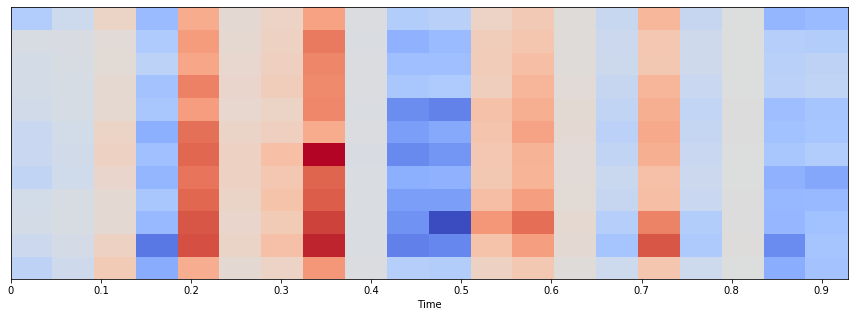

In [46]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(s_list[4,:,0:20].astype(float), x_axis='time', hop_length=hop_length)

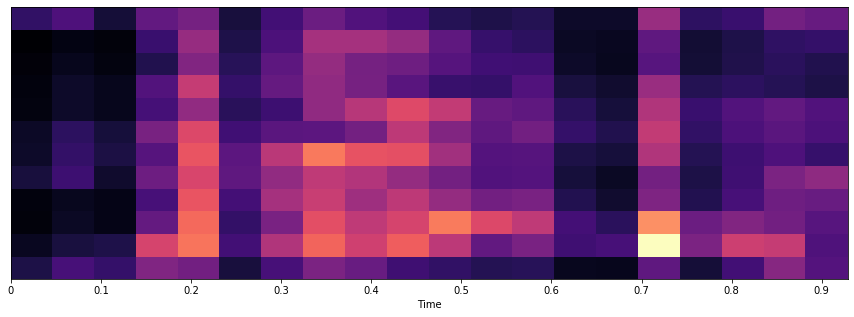

In [47]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(s_list[4,:,0:20], x_axis='time', hop_length=hop_length)

In [20]:
s = np.load("../../data/npy/shuddadhanyasi.npy")

In [21]:
s.shape

(12060, 12, 600)

In [23]:
r = 'shuddadhanyasi.npy'
r[:-3]

'shuddadhanyasi.'

In [24]:
np.tile(1,6)

array([1, 1, 1, 1, 1, 1])

In [32]:
q = []
q.extend(s)
q.extend(s)

In [33]:
np.array(q).shape

(24120, 12, 600)